# Project_Deliverable 2


**Instructions**

Using your dataset from Project Deliverable #1, perform an exploratory data analysis. You will identify any issues that exist with your dataset (e.g. missing or erroneous data). Assess whether your dataset can effectively answer your research questions. Finally, you will create preliminary visualizations addressing your questions.

For this assignment, please submit a well-organized PDF file that includes the following:

At least five graphs or tables linked to your research questions or exploratory data analysis. It is recommended that you have one graph and one summary table per research question.
Interpretations of your visualizations and statistics (the interpretations should be a half of a page for each visualization)
A project synopsis as a Tweet (<280 characters) summarizing your research questions' broader context. Optionally, include a supporting graphic.
Five to seven keywords relevant to your research topic

In [28]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('../Data/12_Nebraska_Tractor_Tests_data.xlsx')

## Dataset

**Nebraska Tractor Tests (Dataset on Brightspace)**

**Description:** Explore the impacts of draft, and Power Take-Off (PTO) for different types of tractors for various models and years. Using this dataset will require that you look up and learn more about the different tractor models, in order to ask reasonable research questions.

## Deliverable 1 - 3 Research Questions

1. Considering a fixed kind of fuel, which are the most important variables to predict the amount of Drawbar HP?
2. Are there any temporal pattern in the evolution of the Drawbar HP?
3. Are there any other confounding variables that might predict the amount of Drawbar HP? Consider analysing the brand and model, to see if there is a certain bias, based on the manufacturer.

## Analysis of Data

In [15]:
# Are the ID unique, or missing?

print(f'''The dataset has {df.shape[0]} number of rows, and had {df['Id'].nunique()} unique IDs, and there are {int(df['Id'].isna().sum())} missing values for Id''')

The dataset has 3846 number of rows, and had 3846 unique IDs, and there are 0 missing values for Id


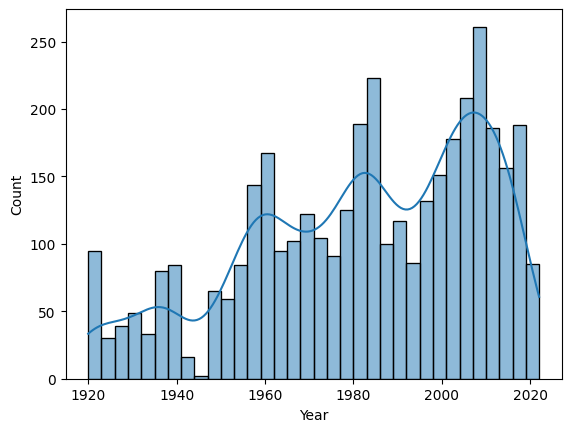

In [17]:
sns.histplot(x="Year", data=df, binwidth=3 ,kde=True)

plt.show()

In [ ]:
df[~df['Drawbar HP'].isna()]

p.where(df['Nebraska Test Number'].str[:7]=='Special')

(array([82]),)

In [31]:
df#['Pdf Link'].unique()

,Id,Pdf Link,Year,Nebraska Test Number,Nebraska Summary Number,Manufacturer,Make,Model,Transmission,Chassis,Fuel,PTO HP,Belt HP,Drawbar HP,Remarks
0,1,Click for test report,1920,1,NaN,Waterloo Gas Engine Co.,Waterloo Boy,"N, 12-25",MAN,2WD,K,NaN,25.0,15.0,NaN
1,2,Click for test report,1920,2,NaN,NaN,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Click for test report,1920,3,NaN,J.I. Case,Case,10-18,MAN,2WD,K,NaN,18.0,11.0,NaN
3,4,Click for test report,1920,4,NaN,J.I. Case,Case,15-27,MAN,2WD,K,NaN,31.0,21.0,NaN
4,5,Click for test report,1920,5,NaN,J.I. Case,Case,22-40,MAN,2WD,K,NaN,49.0,31.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,3842,Click for test report,2022,2257,S1220,John Deere,John Deere,5125M,PRPS 4,FWA,D,109.0,NaN,100.0,NaN
3842,3843,Click for test report,2022,2258,S1221,John Deere,John Deere,9R 390,PSH,4WD,D,323.0,NaN,296.0,NaN
3843,3844,Click for test report,2022,2259,S1222,John Deere,John Deere,9R 440,PSH,4WD,D,321.0,NaN,340.0,partial power PTO
3844,3845,Click for test report,2022,2260,S1223,John Deere,John Deere,9R 490,PSH,4WD,D,321.0,NaN,382.0,partial power PTO


As the main variable we want to explore is the Drawbar HP, we must filter any case where the data is missing

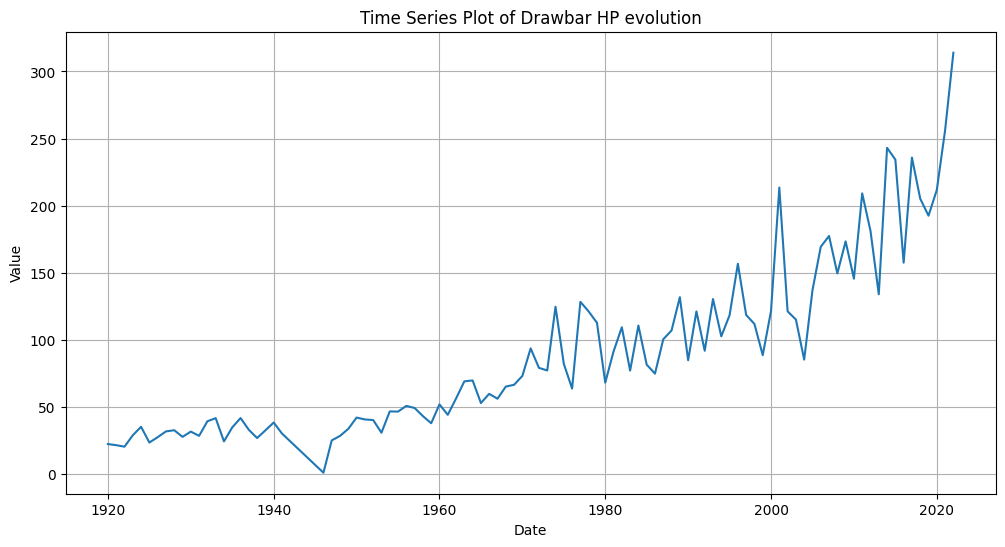

In [29]:
df_gr = df[~df['Drawbar HP'].isna()].groupby(['Year'])['Drawbar HP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gr, x='Year', y='Drawbar HP')
plt.title('Time Series Plot of Drawbar HP evolution')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

We can see a clear trend upwards, indicating that over time, the tractors have increase thie Drawbar over time

In [59]:
df_f = df[(~(df['Nebraska Test Number'].str[:7]=='Special'))&(~df['Drawbar HP'].isna())].reset_index(drop=True)

Now lets explore the rest of the features, after applying the filters, *we filter a weird case of Nebraska Test Number being 'Special'*

In [47]:
df_f.groupby('Nebraska Test Number').filter(lambda x: len(x) > 1)

,Id,Pdf Link,Year,Nebraska Test Number,Nebraska Summary Number,Manufacturer,Make,Model,Transmission,Chassis,Fuel,PTO HP,Belt HP,Drawbar HP,Remarks
28,30,Click for test report,1920,30,NaN,Aultman-Taylor,Aultman-Taylor,30-60,MAN,2WD,G,NaN,80.0,58.0,NaN
29,31,Click for test report,1920,30,NaN,Aultman-Taylor,Aultman-Taylor,30-60,MAN,2WD,K,NaN,75.0,55.0,NaN
78,86,Click for test report,1921,82,NaN,Allis Chalmers,Allis Chalmers,12-20,MAN,2WD,G,NaN,33.0,21.0,NaN
79,87,Click for test report,1921,82,NaN,Allis Chalmers,Allis Chalmers,15-27,MAN,2WD,G,NaN,33.0,21.0,NaN
80,88,Click for test report,1921,83,NaN,Allis Chalmers,Allis Chalmers,18-30,MAN,2WD,G,NaN,43.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,3057,Click for test report,2007,1907A,S580A,CNH,New Holland,TJ 330,PSH,4WD,D,285.0,NaN,258.0,Tested as Case-IH Steiger 330
2940,3058,Click for test report,2007,1908A,S581A,CNH,New Holland,T9030,PSH,4WD,D,347.0,NaN,319.0,Tested as Case-IH Steiger 380
2941,3059,Click for test report,2007,1908A,S581A,CNH,New Holland,TJ 380,PSH,4WD,D,347.0,NaN,319.0,Tested as Case-IH Steiger 380
2942,3060,Click for test report,2007,1909A,S582A,CNH,New Holland,T9040,PSH,4WD,D,384.0,NaN,351.0,Tested as Case-IH Steiger 430


As we see, we can see the same Test, but under different model, fuel or transmission

Now lets explore the Transmission Variable

In [55]:
df_f.groupby('Transmission')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Transmission,,
"Auto PSH, TC",5,248.800000
CVT,236,180.673729
HYD,26,62.038462
Hyd,1,72.000000
MAN,1674,53.754122
"MAN, TC",39,52.102564
"MAN, V belt",1,6.000000
PLAN+V Belt,1,0.600000
PRPS,2,60.000000


We see there are multiple transmission, that seems to be pretty similar, and interesting strategy might be aggregate into common categories. 

Based on a google research, i decided to group them in four groups: MANUAL, AUTOMATIC, CVT & HYD

In [60]:
df_f['Transmission'] = df_f['Transmission'].str.strip()

dict_trans = {'MANUAL': ['MAN','MAN, TC', 'MAN, V belt','PLAN+V Belt','V-belt'],
              'AUTOMATIC': ['Auto PSH, TC','PSH','PSH-TC','PRPS','PRPS 2','PRPS 3','PRPS 4','PRPS 6','PRPS 8'],
              'CVT': ['CVT'],
              'HYD': ['HYD','Hyd']}

df_f['Transmission_Agg'] = np.where(df_f['Transmission'].isin(dict_trans['MANUAL']), 'MANUAL',
                           np.where(df_f['Transmission'].isin(dict_trans['AUTOMATIC']), 'AUTOMATIC',
                           np.where(df_f['Transmission'].isin(dict_trans['CVT']), 'CVT',
                           np.where(df_f['Transmission'].isin(dict_trans['HYD']), 'HYD',
                           'UNKNOWN'))))

In [61]:
df_f.groupby('Transmission_Agg')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Transmission_Agg,,
AUTOMATIC,1644,140.895377
CVT,236,180.673729
HYD,27,62.407407
MANUAL,1725,53.354609


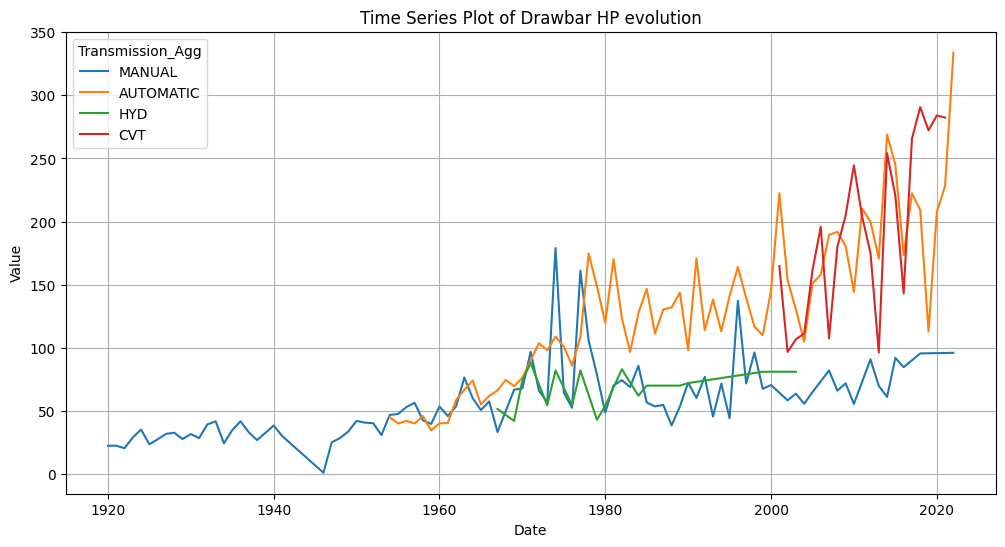

In [62]:
df_gr = df_f.groupby(['Year','Transmission_Agg'])['Drawbar HP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gr, x='Year', y='Drawbar HP',hue='Transmission_Agg')
plt.title('Time Series Plot of Drawbar HP evolution')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Now after performing an aggregation over time we can see that CVT is a particularly new technology, but with a very high Drawbar HP, relative to others, and Automatic transmission have been improving over time, on the other hand, the Manual transmission have improve, but lower than Automatic

Now lest explore the Chasis

In [ ]:
df_f.groupby('Chassis')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Chassis,,
2WD,1656,53.116546
4TD,28,385.964286
4WD,300,253.180000
Crawler,306,131.084967
FTA,4,274.000000
FWA,1326,113.438914
See Remarks,5,19.400000
Single Wheel,1,0.700000
half track,6,257.500000


Using a similar strategy, we can group them into four categories: 2WD, 4WD, FWA & CRAWLER

In [65]:
df_f['Chassis'] = df_f['Chassis'].str.strip()

dict_trans = {'2WD': ['2WD'],
              '4WD': ['4TD','4WD'],
              'FWA': ['FTA','FWA'],
              'CRAWLER': ['Crawler','See Remarks','Single Wheel','half track']}

df_f['Chassis_Agg'] = np.where(df_f['Chassis'].isin(dict_trans['2WD']), '2WD',
                      np.where(df_f['Chassis'].isin(dict_trans['4WD']), '4WD',
                      np.where(df_f['Chassis'].isin(dict_trans['FWA']), 'FWA',
                      np.where(df_f['Chassis'].isin(dict_trans['CRAWLER']), 'CRAWLER',
                      'UNKNOWN'))))

In [66]:
df_f.groupby('Chassis_Agg')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Chassis_Agg,,
2WD,1656,53.116546
4WD,328,264.515244
CRAWLER,318,131.304088
FWA,1330,113.921805


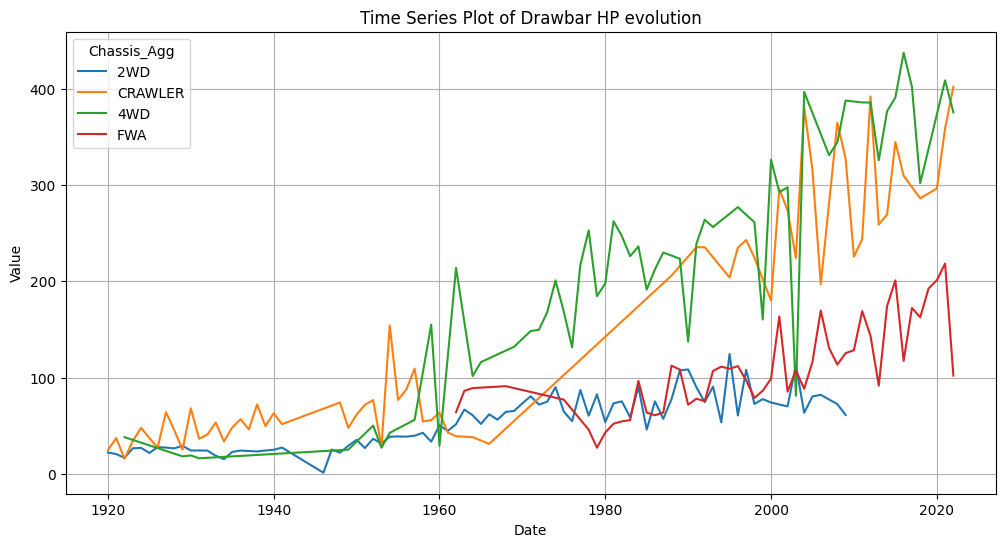

In [67]:
df_gr = df_f.groupby(['Year','Chassis_Agg'])['Drawbar HP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gr, x='Year', y='Drawbar HP',hue='Chassis_Agg')
plt.title('Time Series Plot of Drawbar HP evolution')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

We can see that 4WD is a technology with the biggest improvement as Crawler, while 2WD and FWA have improve but lower

Now we can analyze fuel

In [68]:
df_f.groupby('Fuel')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Fuel,,
D,2775,121.718919
DIST,77,24.181818
G,547,35.898903
K,111,23.459459
LPG,103,54.184466
TF,19,28.368421


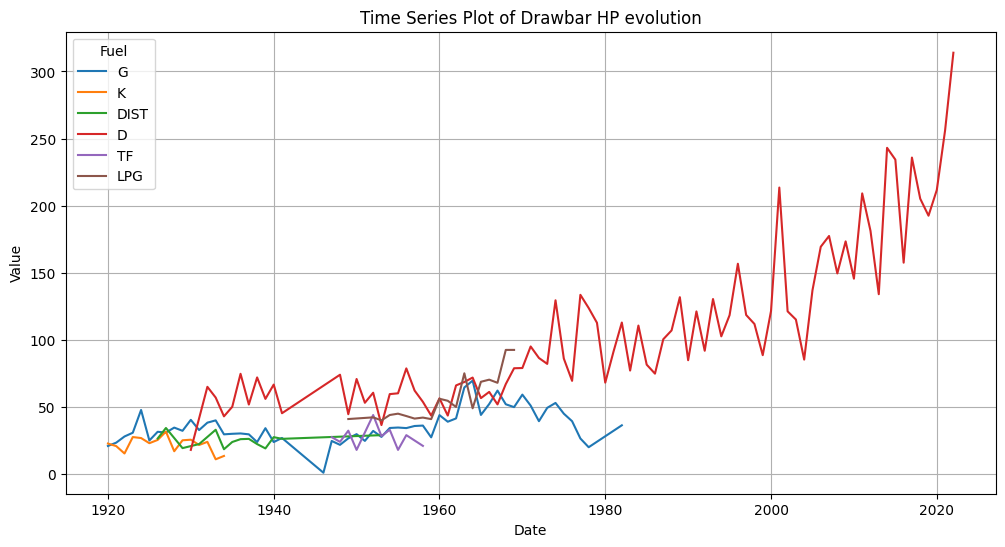

In [69]:
df_gr = df_f.groupby(['Year','Fuel'])['Drawbar HP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gr, x='Year', y='Drawbar HP',hue='Fuel')
plt.title('Time Series Plot of Drawbar HP evolution')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In the case of fuel, we can see that D (diesel), is the maini fuel and the only one being used after 1980, meaning the others might being older tecnologies of fuels, used previouly the development of diesel engines. 

To avoid any baises, we might want to check the distribution prior of 1980:

In [71]:
df_f[df_f['Year']<=1980].groupby('Fuel')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Fuel,,
D,775,76.649032
DIST,77,24.181818
G,544,35.896507
K,111,23.459459
LPG,103,54.184466
TF,19,28.368421


As the results of the analyzes wont generalize over time, I consider to remove all register that are not using diesel, and based the analysis only on diesel test.

In [72]:
df_f_2 = df_f[df_f['Fuel'].isin(['D'])].reset_index(drop=True)

Now lets explore the continuous variables related to Horse Power:

- PTO HP: Horsepower Power Take Off - type float
- Belt HP: the power transmitted by a V-belt from a driving pulley to a driven pulley - type float

In [80]:
df_f_2.describe().iloc[:,2:-1]

,PTO HP,Belt HP
count,2534.000000,150.000000
mean,139.369771,59.826667
std,96.350571,25.683344
min,11.000000,23.000000
25%,70.000000,42.000000
50%,110.000000,52.000000
75%,180.750000,71.750000
max,598.000000,145.000000


We see that Belt HP has a very low fillrate, based on the name, this might be becuase the feature is related with the kind of transmission:

In [81]:
df_f_2[~df_f_2['Belt HP'].isna()].groupby('Transmission')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Transmission,,
MAN,136,52.977941
"MAN, TC",3,56.000000
PRPS 2,11,44.454545


In [82]:
df_f[~df_f['Belt HP'].isna()].groupby('Transmission')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Transmission,,
MAN,689,33.241509
"MAN, TC",5,52.000000
"MAN, V belt",1,6.000000
PLAN+V Belt,1,0.600000
PRPS 2,43,42.465116
V-belt,10,1.370000


The results indicate that this feature is very related to the transmission, particularly being Manual. As the fill-rate is very low, I wont consider this variable in the analysis

Now lets explore the feature PTO HP	

In [83]:
df_f_2[~df_f_2['PTO HP'].isna()][['PTO HP','Drawbar HP']].corr()

,PTO HP,Drawbar HP
PTO HP,1.000000,0.981755
Drawbar HP,0.981755,1.000000


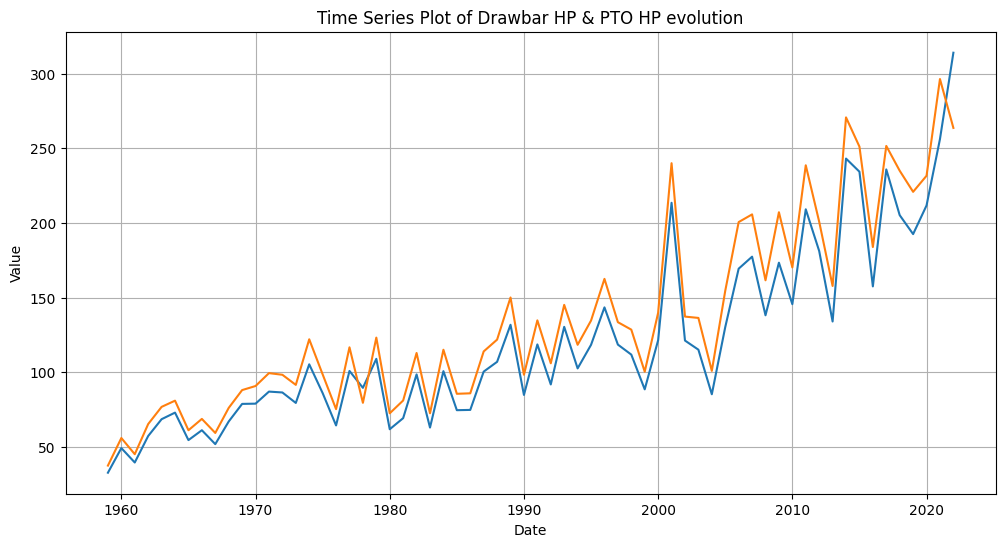

In [85]:
df_gr=df_f_2[~df_f_2['PTO HP'].isna()].groupby(['Year'])[['PTO HP','Drawbar HP']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gr, x='Year', y='Drawbar HP')
sns.lineplot(data=df_gr, x='Year', y='PTO HP')
plt.title('Time Series Plot of Drawbar HP & PTO HP evolution')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

We can see an extremely good relationship of this feature, we could now explore the relationship, over the different kinds of Transmission and Chassis:

In [86]:
df_f_3=df_f_2[~df_f_2['PTO HP'].isna()]

In [92]:
df_f_3.groupby('Transmission_Agg')['PTO HP'].corr(df_f_3['Drawbar HP'])

Transmission_Agg
AUTOMATIC    0.978640
CVT          0.994948
HYD          0.974833
MANUAL       0.950061
Name: PTO HP, dtype: float64

In [93]:
df_f_3.groupby('Chassis_Agg')['PTO HP'].corr(df_f_3['Drawbar HP'])

Chassis_Agg
2WD        0.994520
4WD        0.926463
CRAWLER    0.926928
FWA        0.993642
Name: PTO HP, dtype: float64

We see that in either groups, the relationship of the two variables is very strong, although in the case of the chasis, the 2WD and FWA have an stronger relationship

We decide not to explore manufactur yet, as there multiple, but might be we could aggregate to analyze them later

In [96]:
df_f_3.groupby('Manufacturer')['Drawbar HP'].agg(['count', 'mean'])

,count,mean
Manufacturer,,
AGCO,216,189.981481
AGCO England,7,59.142857
AGCO France,114,126.061404
AGCO Germany,18,164.611111
AGCO S.A.,6,115.000000
...,...,...
Zaklady Mechaniczne,3,28.333333
Zavody Jana Svermy,1,44.000000
Zavody Tazkeho,4,93.500000


## Conclusions Based on Analysis

Now based on the analysis of the data I like to answer how feasable would be to anwser the three research questions, previously proposed:

1. Considering a fixed kind of fuel, which are the most important variables to predict the amount of Drawbar HP?

As we saw, the variable Belt HP has a very low fill-rate, and is fill mostly for Manual Transmission, so the variable might not be ideal. On the other hand, the variable PTO is extremely good as predictable (based on the high correlation over all, and by grouping transmission or chasis).

2. Are there any temporal pattern in the evolution of the Drawbar HP?

We saw that drawbar HP has a positive trend over time, showing the improve of tractor technologies. Although as we saw, this relationship is not the same for all Transmsissions and Chasis. 


3. Are there any other confounding variables that might predict the amount of Drawbar HP? Consider analysing the brand and model, to see if there is a certain bias, based on the manufacturer.

we saw that the variable PTO is extremely correlate with Drawbar, but we saw that Drawbar differs significally between Transmission, Chasis and Time. In the future if we would like to build a model, I would test a normal linear regression, and benchmark this with a Mixed-Effects models, based on a combinations of categories (and/or time), to see if we could build a better model than a simple regression between PTO vs Drawbar